<a href="https://colab.research.google.com/github/dldkfma9577/githubtest/blob/main/1119%ED%94%8C%EB%A6%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

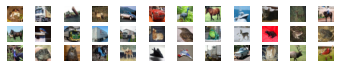

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
con

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수를 변화
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

#각 class의 label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6,1))
for i in range(36): #36장만 그리기
  plt.subplot(3,12,i+1) #3행 12열 / 1부터 시작 
  plt.imshow(train_images[i],cmap='gray')
  plt.axis("off") #축은 생략
plt.show()

# shape
# train_images : (60000,28,28)
# train_labels : (60000, 1)
# test_images : (10000, 28, 28)
# test_labels : (6000, 1)

#28x28차원의 벡터가 60000개 채널은 1개
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images/255.0, test_images / 255.0

print(train_labels[:10])

from tensorflow.keras.utils import to_categorical

# 모델 구성 - 네트워크 구조 표로 보는 것
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', strides=(1,1), input_shape=(32,32,3))) # Convolution layer 3x3x32 필터 / 커널 수 : 32
model.add(tf.keras.layers.MaxPooling2D((2,2))) # Max-pooling layer :2x2 필터 사용
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')) #Convolution layer 3x3x64 필터
model.add(tf.keras.layers.MaxPooling2D((2,2))) # Max-pooling layer :2x2 필터 사용
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu')) #Convolution layer 3x3x64 필터
model.add(tf.keras.layers.MaxPooling2D((2,2))) # Max-pooling layer :2x2 필터 사용
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten()) #1차원으로 변경
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #fc layer

#학습 과정
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 요약 출력
model.summary()

#모델 학습
#validation 추가
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 10)

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행 1열의 첫번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') #loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') #accuracy는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

#모델 평가 및 결과 출력
print('\n===========test result===============')
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,
                                            test_labels, verbose=2)[1]))

#테스트 영상 중 10개만 출력하고 예측결과를 그림위에 표시한 것
fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32,32,3)), cmap = plt.cm.gray_r)

plt.show()

print("===========================")